In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans, DBSCAN

data = pd.read_csv("donnees/Mall_Customers.csv")

In [74]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [75]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import silhouette_score

# 1. Kmeans essai 1
Un seul modèle avec 5 clusters

Inertia : 303.2874941784071
Silhouette Score : 0.3194701864060389


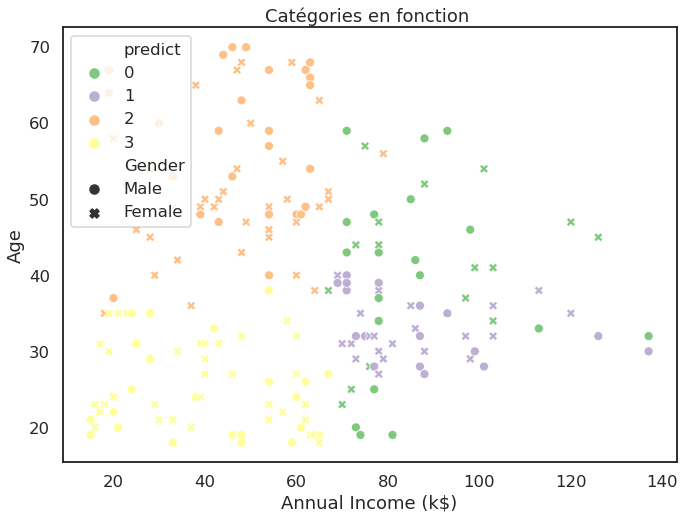

In [101]:
num_attribs = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]
cat_attribs = ["Gender"]

num_pipeline = Pipeline([
    ("std_scaler", StandardScaler())
])

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
])

k = 4

X = full_pipeline.fit_transform(data)

clustering = KMeans(n_clusters=k)

KMeans(n_clusters=k)
clustering.fit(X)
y_pred = clustering.fit_predict(X)
data["predict"] = y_pred

print("Inertia :",clustering.inertia_)
print("Silhouette Score :",silhouette_score(X,clustering.labels_))

sns.set_style("white")
sns.set_context("talk")

plt.figure(figsize=(11,8))
plt.subplot(111)
sns.scatterplot(data=data, x="Annual Income (k$)", y="Age", hue="predict",style="Gender", palette="Accent")

plt.title("Catégories en fonction ")
plt.legend(loc="upper left")

plt.show()
plt.close()

# 1. DBSCAN essai 1
1 seul modèle 5 clusters

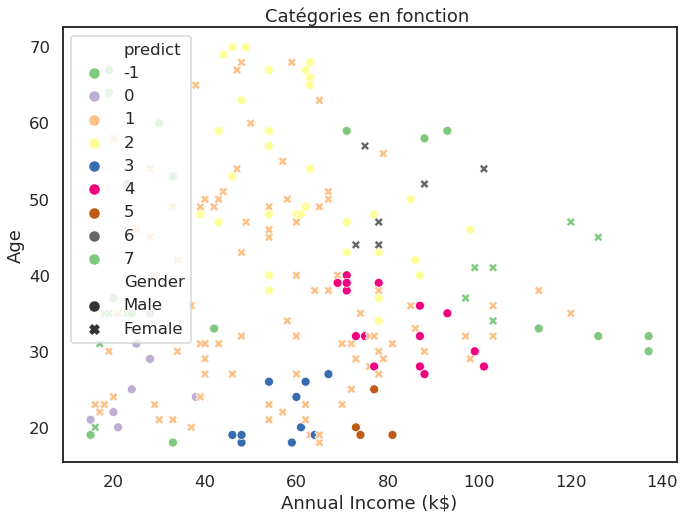

In [103]:
num_attribs = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]
cat_attribs = ["Gender"]

num_pipeline = Pipeline([
    ("std_scaler", StandardScaler())
])

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
])

e = 0.7
minsamp = 4

X = full_pipeline.fit_transform(data)

clustering = DBSCAN(eps=e, min_samples=minsamp)

DBSCAN(eps=e, min_samples=minsamp)
clustering.fit(X)
y_pred = clustering.fit_predict(X)
data["predict"] = y_pred

sns.set_style("white")
sns.set_context("talk")

plt.figure(figsize=(11,8))
plt.subplot(111)
sns.scatterplot(data=data, x="Annual Income (k$)", y="Age", hue="predict",style="Gender", palette="Accent")

plt.title("Catégories en fonction ")
plt.legend(loc="upper left")

plt.show()
plt.close()

# 2. Variation de n_clusters (Kmeans) et de [epsilon,min_samp] (DBSCAN)
## 2.1. Kmeans et n_clusters

<AxesSubplot:xlabel='cluster', ylabel='silhouette'>

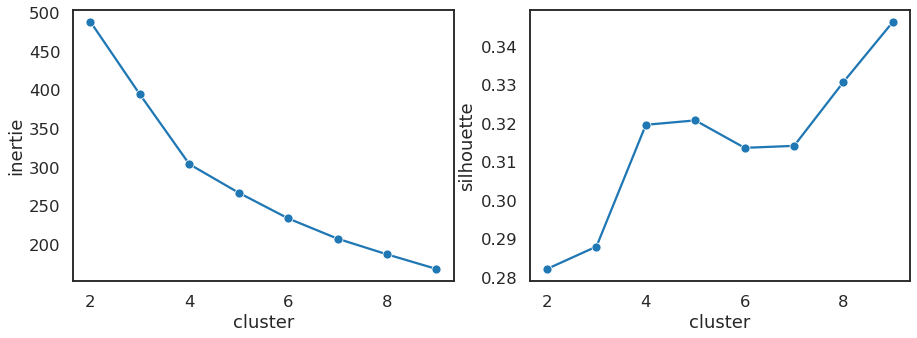

In [79]:
nclusters = [i for i in range(2,10)]
inertie = []
silhouette = []

for n in nclusters :
    clustering = KMeans(n_clusters=n)
    clustering.fit(X)
    silhouette.append(silhouette_score(X,clustering.labels_))
    inertie.append(clustering.inertia_)

kmeans_metric = pd.DataFrame({'cluster':nclusters, 'silhouette':silhouette, 'inertie':inertie})


# Tracé
sns.set_style("white")
sns.set_context("talk")

plt.figure(figsize=(15,5))

plt.subplot(121)
sns.lineplot(data=kmeans_metric, x="cluster", y="inertie", marker='o')

plt.subplot(122)
sns.lineplot(data=kmeans_metric, x="cluster", y="silhouette", marker='o')

## 2.2 DBSCAN, espilon et min_samples
### 2.2.1. Boucle sur espilon

<AxesSubplot:xlabel='epsilon', ylabel='silhouette'>

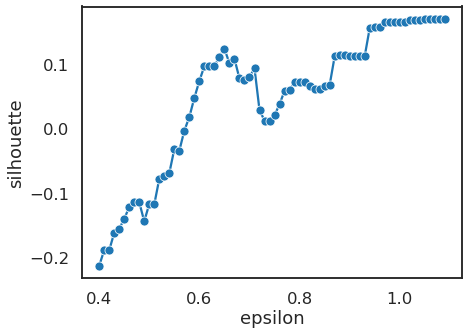

In [94]:
epsilon = np.arange(0.4, 1.1, 0.01)
inertie = []
silhouette = []

minsamp = 7

for e in epsilon:
    clustering = DBSCAN(eps=e, min_samples=minsamp)
    clustering.fit(X)
    silhouette.append(silhouette_score(X,clustering.labels_))

dbscan_metric = pd.DataFrame({'epsilon':epsilon, 'silhouette':silhouette})

# Tracé
sns.set_style("white")
sns.set_context("talk")

plt.figure(figsize=(15,5))

plt.subplot(122)
sns.lineplot(data=dbscan_metric, x="epsilon", y="silhouette", marker='o')
    

### 2.2.2. Boucle sur min_samples

<AxesSubplot:xlabel='min_samples', ylabel='silhouette'>

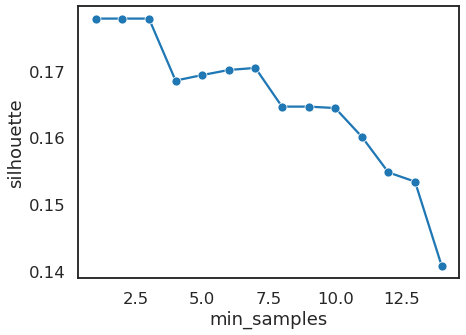

In [96]:
minsamp = np.arange(1, 15, 1)
inertie = []
silhouette = []

epsilon = 0.7

for ms in minsamp:
    clustering = DBSCAN(eps=e, min_samples=ms)
    clustering.fit(X)
    silhouette.append(silhouette_score(X,clustering.labels_))

dbscan_metric = pd.DataFrame({'min_samples':minsamp, 'silhouette':silhouette})

# Tracé
sns.set_style("white")
sns.set_context("talk")

plt.figure(figsize=(15,5))

plt.subplot(122)
sns.lineplot(data=dbscan_metric, x="min_samples", y="silhouette", marker='o')